<a href="https://colab.research.google.com/github/ritikaseth1003/CC_LAB2_PES1UG23AM239/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install Dependencies

In [1]:
pip install pandas numpy scikit-learn tensorflow

Import Libraries

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


Load Dataset

In [3]:
data = pd.read_csv("Churn_Modelling.csv")


Displaying first few rows to understand dataset structure

In [4]:
print(data.head())



   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

Feature & Target Selection

In [5]:
X = data.iloc[:, 3:13].values
y = data.iloc[:, 13].values


Train-Test Split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


Encoding + Feature Scaling

In [7]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# 1. Encode 'Gender' column (Index 2 in X)
le = LabelEncoder()
X_train[:, 2] = le.fit_transform(X_train[:, 2])
X_test[:, 2] = le.transform(X_test[:, 2])

# 2. Encode 'Geography' column (Index 1 in X) using OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X_train = np.array(ct.fit_transform(X_train))
X_test = np.array(ct.transform(X_test))

# 3. Apply Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print("Feature scaling completed successfully.")

Feature scaling completed successfully.


Build ANN Model

In [8]:
model = Sequential()
model.add(Dense(units=6, activation='relu'))
model.add(Dense(units=6, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))


Compile Model

In [9]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


Train Model

In [10]:
model.fit(X_train, y_train, batch_size=32, epochs=50)


Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5124 - loss: 0.8306
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7908 - loss: 0.4930
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8024 - loss: 0.4567
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8070 - loss: 0.4389
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8226 - loss: 0.4152
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8295 - loss: 0.4075
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8368 - loss: 0.3917
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8427 - loss: 0.3720
Epoch 9/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8441 - loss: 0.3724
Epoch 10/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8508 - loss: 0.3676
Epoch 11/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8459 - loss: 0.3684
Epoch 12/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Predictions

In [11]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


Model Evaluation

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)

print("Accuracy:", accuracy_score(y_test, y_pred))


[[1546   61]
 [ 223  170]]
Accuracy: 0.858


Save Model

In [16]:
model.save("my_model.keras")


#DEMO FOR PART 1


In [17]:
# ==============================
# ANN Binary Classification Demo
# ==============================

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import load_model

# Load dataset (needed to rebuild preprocessing pipeline)
data = pd.read_csv("Churn_Modelling.csv")

# Feature selection
X = data.iloc[:, 3:13].values
y = data.iloc[:, 13].values

# Recreate encoders (same logic as training)
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])  # Gender encoding

ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), [1])],
    remainder='passthrough'
)
X = np.array(ct.fit_transform(X))    # Geography encoding

# Recreate scaler
sc = StandardScaler()
X = sc.fit_transform(X)

# Load trained ANN model
model = load_model("my_model.keras")

print("✅ Model loaded successfully.\n")

# Example new customer data
sample = [[600, 'France', 'Female', 40, 3, 60000, 2, 1, 1, 50000]]

sample = pd.DataFrame(sample)

# Apply SAME preprocessing
sample.iloc[:, 2] = le.transform(sample.iloc[:, 2])
sample = ct.transform(sample)
sample = sc.transform(sample)

# Prediction
prediction = model.predict(sample)

print("🔹 Churn Probability:", prediction[0][0])
print("🔹 Churn Prediction:", "Yes (Customer likely to churn)" if prediction > 0.5 else "No (Customer likely to stay)")


✅ Model loaded successfully.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
🔹 Churn Probability: 0.09053551
🔹 Churn Prediction: No (Customer likely to stay)


#----------------------------------------------------


============================================================
# MNIST Digit Recognition using ANN (Multi-Class Classification)
============================================================

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score, confusion_matrix

print("📁 Loading MNIST Dataset...")

# Load dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

print(f"✅ Training samples: {X_train.shape[0]}")
print(f"✅ Testing samples: {X_test.shape[0]}")

📁 Loading MNIST Dataset...
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
✅ Training samples: 60000
✅ Testing samples: 10000


# Data Preprocessing

In [19]:
# Normalize pixel values (0 → 255 → 0 → 1)
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Flatten 28×28 images → 784 features
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

print("✅ Data normalization & reshaping completed.")

✅ Data normalization & reshaping completed.


# Build ANN Model

In [20]:
print("\n🧠 Building ANN Model...")

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')   # SOFTMAX → Multi-class output
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("✅ Model Summary:")
model.summary()



🧠 Building ANN Model...
✅ Model Summary:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

# Train Model

In [21]:
print("\n🚀 Training Model...")

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=32,
    verbose=0
)

print("✅ Training Completed.")



🚀 Training Model...
✅ Training Completed.


# Evaluation

In [22]:
print("\n🧪 Evaluating Model...")

y_pred_probs = model.predict(X_test, verbose=0)
y_pred = np.argmax(y_pred_probs, axis=1)

accuracy = accuracy_score(y_test, y_pred)

print(f"\n📊 MNIST ANN Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")


🧪 Evaluating Model...

📊 MNIST ANN Accuracy: 0.9785 (97.85%)


# Confusion Matrix Insight

In [23]:
cm = confusion_matrix(y_test, y_pred)

print("\n📊 Correct Predictions Per Digit:")
for i in range(10):
    print(f"Digit {i}: {cm[i,i]} correct")


📊 Correct Predictions Per Digit:
Digit 0: 968 correct
Digit 1: 1125 correct
Digit 2: 1009 correct
Digit 3: 988 correct
Digit 4: 962 correct
Digit 5: 865 correct
Digit 6: 943 correct
Digit 7: 998 correct
Digit 8: 941 correct
Digit 9: 986 correct


# Sample Predictions Visualization

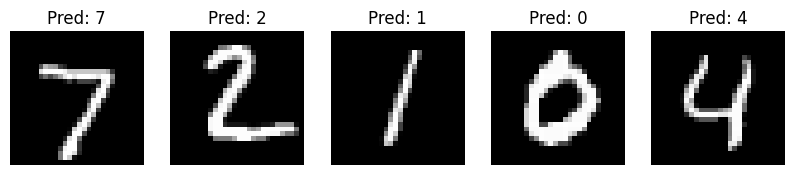

In [24]:
plt.figure(figsize=(10,4))

for i in range(5):
    plt.subplot(1,5,i+1)
    img = X_test[i].reshape(28,28)
    plt.imshow(img, cmap='gray')
    plt.title(f"Pred: {y_pred[i]}")
    plt.axis('off')

plt.show()

# Save Model

In [25]:
model.save("mnist_ann_model.keras")

print("\n💾 Model saved as 'mnist_ann_model.keras'")



💾 Model saved as 'mnist_ann_model.keras'
